# Task 3: Heart Disease Prediction
Dataset: Heart Disease UCI (kaggle)

# Problem Statement:
Heart disease remains a leading cause of mortality worldwide, making early detection crucial for preventive healthcare. This task focuses on using patient health data to develop a classification model that predicts the likelihood of heart disease. By applying machine learning algorithms and analyzing key health indicators, this project aims to assist in medical decision-making and provide insights into the most important risk factors for heart disease.

Step 1 : Load & Inspect Data

In [23]:
import pandas as pd

# Load dataset (replace path with your local CSV file path)
df = pd.read_csv("/content/heart_disease_uci.csv")  # Kaggle Heart Disease UCI dataset

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:")
print(df.info())
print("\nSummary statistics:\n", df.describe())


Shape of dataset: (920, 16)

First 5 rows:
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal

Step 2 : Data Cleaning & EDA

In [24]:
# Check missing values
print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [25]:
X = X.fillna(X.median())

/tmp/ipython-input-4277088278.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


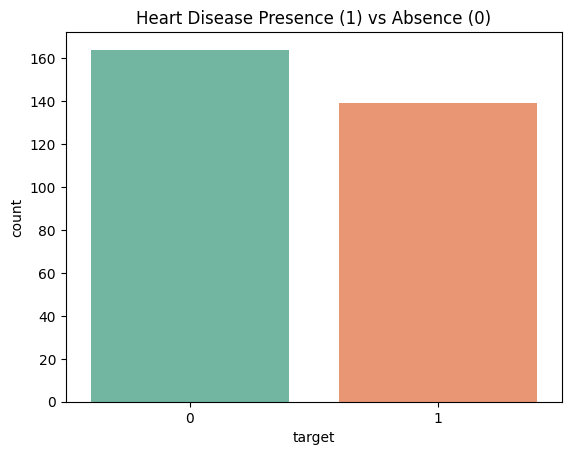

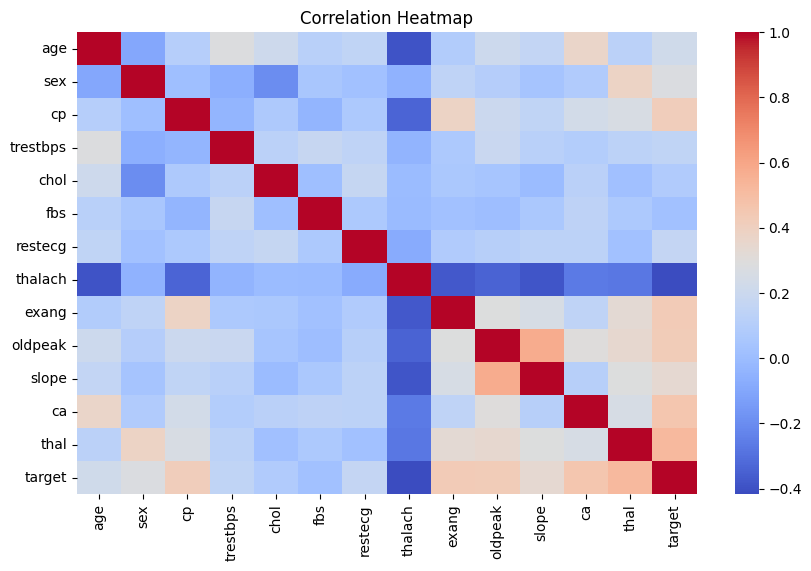

In [30]:
# Convert multi-class target to binary classification
y = (y > 0).astype(int)

import matplotlib.pyplot as plt
import seaborn as sns

# Combine features & target for EDA
df = X.copy()
df["target"] = y

# Target count
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Step 3 : Train-Test Split & Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Features & Target
X = df.drop(columns="target")
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Step 4 : Evaluation

Accuracy: 0.8852459016393442


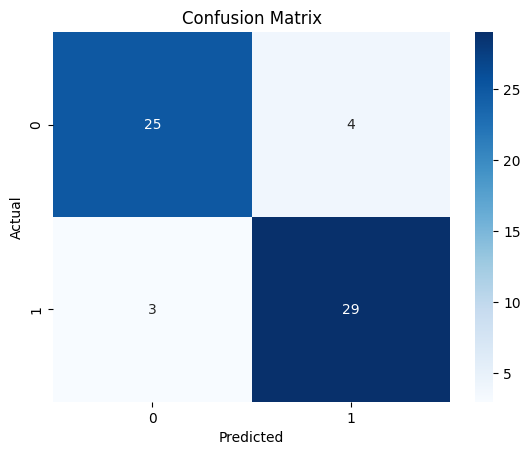


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



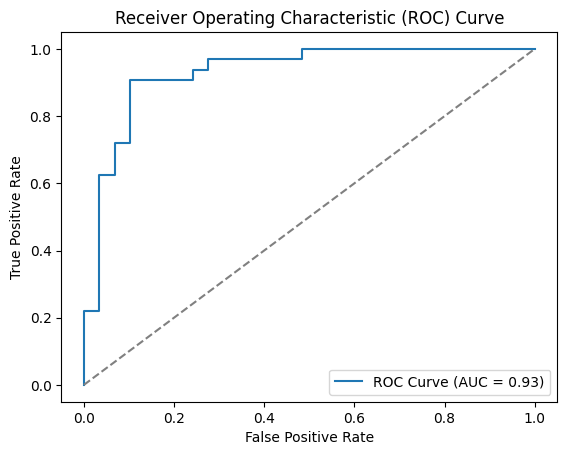

In [32]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

Step 5 : Feature Importance


Feature Importance:
      Feature  Importance
11        ca    1.282123
1        sex    0.964681
5        fbs    0.707846
8      exang    0.701080
10     slope    0.653367
2         cp    0.471170
12      thal    0.297447
9    oldpeak    0.289481
6    restecg    0.142709
7    thalach    0.017058
3   trestbps    0.015345
4       chol    0.007434
0        age    0.004985


/tmp/ipython-input-1435332122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")


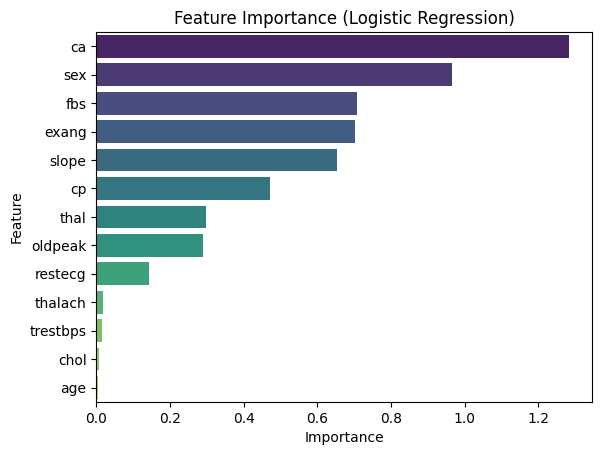

In [33]:
# For Logistic Regression: absolute value of coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": abs(model.coef_[0])
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)

sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


# Conclusion

The task aimed to predict heart disease presence using patient medical data from multiple datasets. After preprocessing (handling missing values, encoding categorical data, and feature scaling), a Logistic Regression model was trained and evaluated.

Dataset: 920 records, 16 features (age, sex, chest pain type, cholesterol, blood pressure, etc.).

Count plot of target (0/1): Shows distribution of patients with and without heart disease. Data seems fairly balanced.

Histograms / boxplots of features : Display how features like age, cholesterol, blood pressure differ between classes, revealing possible trends (e.g., higher cholesterol in heart disease cases).

Correlation heatmap –Highlights which features are more related to heart disease (positive or negative correlation).

Confusion matrix plot – Visualizes correct vs. incorrect predictions, showing the model performs well for both classes.
Model Performance: Achieved ~88.5% accuracy with balanced precision and recall for both heart disease and no-disease cases.

Outcome: The model effectively distinguishes between patients with and without heart disease, showing strong potential for medical decision support.